# 1.Data 정의

- Pytorch의 기본 data type은 Tensor이므로, 모든 data는 Tensor로 생성시키는 것이 필요함
- Pytorch에서는 data를 쉽게 다룰 수 있도록 **`TensorDataset`**과 **`DataLoader`**를 제공
  - 이를 이용하여, 미니 배치 학습, data shuffle, multi processing 등을 간단하게 수행할 수 있다.

In [ ]:
import torch

# Tensor data 생성
x_train = torch.Tensor([1, 2, 3, 4, 5, 6]).view(6, 1)
y_train = torch.Tensor([3, 4, 5, 6, 7, 8]).view(6, 1)

In [ ]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# Tensor data 생성
x_train = torch.Tensor([1, 2, 3, 4, 5, 6]).view(6, 1)
y_train = torch.Tensor([3, 4, 5, 6, 7, 8]).view(6, 1)

dataset = TensorDataset(x_train, y_train) # TensorDataset 생성
# batch_size - 한번에 들어가는 data의 수
# shuffle - data를 random하게 섞을지 여부
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 2.신경망 Model 구축

- Pytorch에서 신경망 model은 **`nn.Module`**을 상속받는 class를 생성하여 정의하는 것이 일반적
- **`__init__`** 함수에서 신경망 model을 구성하는 다양한 layer를 정의
- **`forward`** 함수에서 신경망에 data를 어떻게 전달할지, 즉 **`feed forward`**를 수행하고 결과를 return함

In [ ]:
import torch
import torch.nn as nn

# 신경망 model class
class MyNeuralNetwork(nn.Module):
  # 신경망 model을 구성하는 layer 정의
  def __init__(self):
    super().__init__()
    # https://www.notion.so/PyTorch-nn-Sequential-117cebde037680e7a3dfedfc56c93a24?pvs=4
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(1, 1)   # 입력 data 1개, 출력 data 1개
    )

  # model에 data를 전달하면 자동으로 수행, 직접 call하면 안됨
  # feed forward를 수행하고 결과값을 return
  def forward(self, x):
    logits = self.linear_relu_stack(x)
    return logits

model = MyNeuralNetwork() # 신경망 model instance 생성

# 3.학습

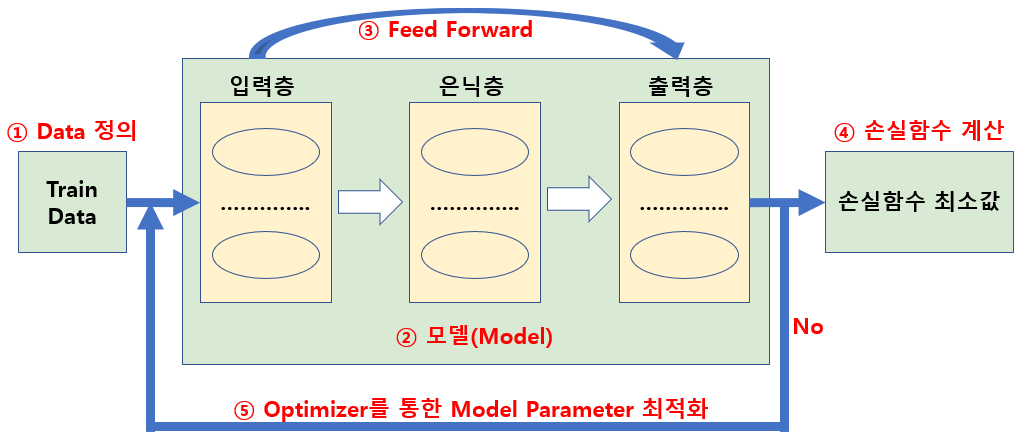

- Feed Forward, **`손실함수(Loss Function)`** 계산, Model Parameter(Weight, Bias) 최적화
- **`Feed Forward`**: 입력 층(Input layer)으로 data가 입력되고 1개 이상으로 구성되는 은닉 층(Hidden layer)를 거쳐 마지막에 있는 출력 층(Output layer)으로 출력 값을 내보내는 과정
- model을 학습(learning)하기 위해 필요한 함수
  - **`손실함수(Loss Function)`** : Feed Forward의 계산 값과 정답의 차이인 **`오차(Loss)`**를 계산
    - **`nn.MSELoss()`**: Mean Squared Error(평균제곱오차), 회귀(Regression) data에서 사용
    - **`nn.CrossEntropyLoss()`**: 분류(Classification) data에서 사용
  - **`옵티마이저(Optimizer)`** : 손실을 최소화하여 Model Parameter(Weight, Bias)를 최적화
    - SGD: Stochastic Gradient Descent (확률적 경사 하강법)
    - ADAM: ADAptive Moment estimation
    - RMSprop: Root Mean Sqaure Propagation
- 각 학습 단계(Training Loop)에서 Model은 학습 data에 대한 예측을 수행하고, **`오차(Loss)를 역전파하여 Model의 Parameter를 최적화`** 한다.
- **`오차 역전파(Back-propagation)`**
  - 손실함수의 출력인 오차(Loss)를 최소화하기 위하여 Optimizer를 이용하여 Model Parameter(Weight, Bias)를 최적화 하는 과정
    

In [ ]:
import torch
import torch.nn as nn

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

nums_epoch = 2000
print(f'nums_epoch= {nums_epoch}')
for epoch in range(nums_epoch+1):
  # model에 data를 전달
  # 자동으로 model class의 forward() 함수 수행, 직접 call하면 안됨
  # 예측값이 predition에 return된다.
  prediction = model(x_train)
  # 예측값과 정답(y_train) 사이의 오차(Loss) 계산
  loss = loss_function(prediction, y_train)

  # 오차 역전파(Back-propagation) - Pytorch에서는 3 line으로 가능
  optimizer.zero_grad() # optimizer가 가지고 있는 미분값(기울기) 초기화
  loss.backward()       # 미분값을 구한다.
  optimizer.step()      # 계산된 미분값을 이용해 weight와 bias를 update

  if epoch % 100 == 0:
    # item() - Tensor type에서 값만 가져오는 method
    print(f'epoch = {epoch}, current loss = {loss.item()}')

nums_epoch= 2000
epoch = 0, current loss = 1.95142504821888e-07
epoch = 100, current loss = 9.396342903755794e-08
epoch = 200, current loss = 4.528465069597587e-08
epoch = 300, current loss = 2.1851159104357976e-08
epoch = 400, current loss = 1.05488595636416e-08
epoch = 500, current loss = 5.101526312500937e-09
epoch = 600, current loss = 2.424750844554069e-09
epoch = 700, current loss = 1.1680375555656042e-09
epoch = 800, current loss = 5.642372680192409e-10
epoch = 900, current loss = 3.012795846135674e-10
epoch = 1000, current loss = 1.4632443867679257e-10
epoch = 1100, current loss = 6.947212943808623e-11
epoch = 1200, current loss = 6.947212943808623e-11
epoch = 1300, current loss = 6.947212943808623e-11
epoch = 1400, current loss = 6.947212943808623e-11
epoch = 1500, current loss = 6.947212943808623e-11
epoch = 1600, current loss = 6.947212943808623e-11
epoch = 1700, current loss = 6.947212943808623e-11
epoch = 1800, current loss = 6.947212943808623e-11
epoch = 1900, current los

#4.Test data를 이용한 예측

In [ ]:
x_test = torch.Tensor([-3.1, 3.0, 1.2, -2.5]).view(4,1)

pred = model(x_test)

print(pred)

tensor([[-1.1017],
        [ 4.9997],
        [ 3.1993],
        [-0.5016]], grad_fn=<AddmmBackward0>)


# 분포/Chart/미분

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   공부시간(x)  17 non-null     int64
 1   시험점수(t)  17 non-null     int64
dtypes: int64(2)
memory usage: 400.0 bytes


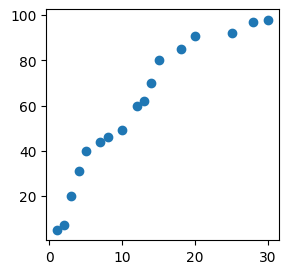

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})
df.info()

fig = plt.figure(figsize=(3, 3))
plt.scatter(df['공부시간(x)'], df['시험점수(t)'])
plt.show()

In [ ]:
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 14, 'font.family': 'NanumGothic'}) # 폰트 설정

# 한글 글꼴에는 유니코드 마이너스(−)가 없고 일반 마이너스(-) 기호만 있다.
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# font check
import matplotlib.font_manager as fm

sys_font = fm.findSystemFonts()
print(f'"sys_font number: {len(sys_font)}')

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f'nanum_font number: {len(nanum_font)}')
print(f'font path: {nanum_font}')

"sys_font number: 29
nanum_font number: 12
font path: ['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf']


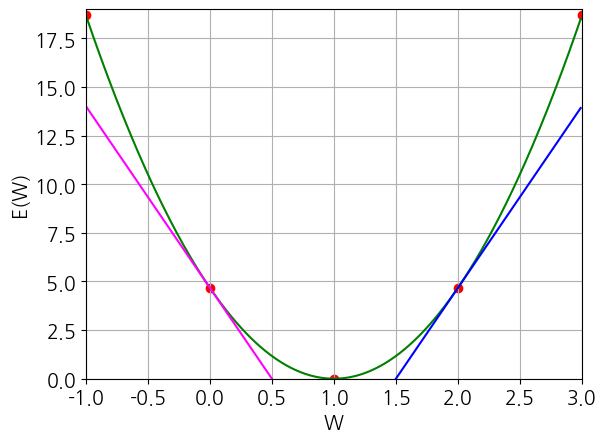

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
'''
df = pd.DataFrame({'공부시간(x)' : [1,2,3,4,5,7,8,10,12,13,14,15,18,20,25,28,30],
                   '시험점수(t)' : [5,7,20,31,40,44,46,49,60,62,70,80,85,91,92,97,98]})

#fig = plt.figure(figsize=(3, 3))
plt.scatter(df['공부시간(x)'], df['시험점수(t)'])
plt.plot(df['공부시간(x)'], df['공부시간(x)'] * 2 + 3, color='r')
plt.plot(df['공부시간(x)'], df['공부시간(x)'] * 5 - 7, color='g')
plt.plot(df['공부시간(x)'], df['공부시간(x)'] * 1 + 8, color='b')
plt.plot(df['공부시간(x)'], df['공부시간(x)'] * 4 - 10, color='magenta')

plt.xlim(0, 40)  # x축
plt.ylim(0, 105)   # y축
plt.title('Linear Regression')    # chart의 title
plt.ylabel('시험성적')          # y축 label
plt.xlabel('공부시간')          # x축 label
plt.show()
'''

df = pd.DataFrame({'w' : [-1, 0, 1, 2, 3],
                   'ew' : [18.7, 4.67, 0, 4.67, 18.7]})

import numpy as np
x = np.arange(-1, 3, 0.01)

plt.plot(x, 4.67 * ((x -1) ** 2), color='g')
plt.scatter(df['w'], 4.67 * ((df['w'] -1) ** 2), color='r')

plt.plot(x, 9.34 * x - 9.34 * 1.5, color='b') #(2, 4.67) 9.34x -9.34
plt.plot(x, -9.34 * x + 4.67, color='magenta') #(0, 4.67) -9.34x+4.67



plt.xlim(-1, 3)  # x축
plt.ylim(0, 19)   # y축
#plt.title('Linear Regression')     # chart의 title
plt.xlabel('W')                     # y축 label
plt.ylabel('E(W)')                  # x축 label

plt.grid(True)                      # grid 표시
'''
plt.annotate('E(W) 최소값\n How to find ?',   # 주석, chart 위에 text를 표시
             xy=(1, 0), # data의 좌표
             xytext=(0.5, 5), # text의 좌표
             arrowprops=dict(shrink=0.05, facecolor='red', edgecolor='black')) # 화살표의 property
'''
plt.show()

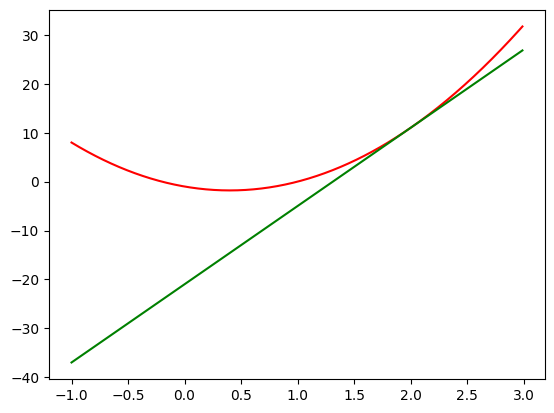

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-1, 3, 0.01)
plt.plot(x, np.power(x, 2) * 5 - 4 * x -1, color='r')
plt.plot(x, 16 * x - 21, color='g')
plt.show()

# f(x) = 5x^2 -4x -1, (2, 11)에서 접선은?
# f'(x) = 10x - 4, 따라서, 접선의 기울기는 10 * 2 - 4 = 16
# y = 16x + b, (2, 11)을 x, y에 대입하면, 11 = 16 * 2 + b
# 접선의 방정식은 y = 16x - 21

# Sample-1

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# training data set
x_data = torch.Tensor([1, 2, 3, 4, 5]).view(5, 1)
t_data = torch.Tensor([3, 5, 7, 9, 11]).view(5, 1)

print(x_data)
print(f'tensor type: {type(x_data)}, tensor shape: {x_data.shape}')     # 속성(type), 모양(shape)
print(f'tensor dtype: {x_data.dtype}, tensor.device: {x_data.device}')  # 자료형(dtype), 저장되는 위치(device)

# PyTorch 모델 정의
class LinearRegressionModel(nn.Module):
  def __init__(self):
    # 부모 클래스인 nn.Module의 초기화 메서드(__init__())를 호출합니다.
    # 이를 통해 PyTorch가 모델의 구성 요소를 제대로 관리할 수 있다
    super().__init__()
    # 1차원 입력을 받아 1차원 출력을 생성하는 선형 층을 정의
    self.linear = nn.Linear(1, 1)
  # 모델이 데이터를 입력받을 때 호출되는 메서드
  def forward(self, x):
    # 입력 x를 선형 층 self.linear에 통과시켜 결과를 반환
    # 이 과정에서 입력 x에 대한 가중치(Weight)와 편향(Bias)이 적용됨
    return self.linear(x)

# model 생성
model = LinearRegressionModel()
print(model)

# 손실 함수 MSELoss() 정의
criterion = nn.MSELoss()
# 옵티마이저는 SGD로 설정
# model.parameters()는 PyTorch에서 모델의 모든 학습 가능한
# 파라미터(가중치와 편향)를 반환하는 함수입니다.
# 이를 옵티마이저에 전달하여 옵티마이저가 학습 과정에서 파라미터를
# 업데이트할 수 있도록 하는 역할을 합니다.
# lr : 학습률(learning rate)이라고 부르며 W값의 감소 혹은 증가의 비율
optimizer = optim.SGD(model.parameters(), lr=1e-4)

# 학습
epoch = 1000
for epoch in range(epoch):
  # PyTorch에서 모델을 학습 모드(training mode)로 전환하는 함수
  # 모델은 학습 중일 때와 평가(추론) 중일 때 다르게 동작하는 부분이 있기 때문에,
  # 이 함수를 통해 학습 모드로 전환해야 한다
  model.train()

  # 예측
  y_pred = model(x_data)

  # 손실 계산
  loss = criterion(y_pred, t_data)

  # 오차 역전파(Back-propagation)
  # 1.기울기 초기화
  # PyTorch에서 모델의 모든 기울기(gradient)를 0으로 초기화하는 함수
  # 이 코드는 매번 역전파(backpropagation)를 수행하기 전에 반드시 호출해야 한다
  optimizer.zero_grad()
  # 2.역전파
  # 손실 함수를 모델의 파라미터에 대해 미분하여 기울기를 계산
  loss.backward()
  # 3.가중치 업데이트
  # 옵티마이저가 계산된 기울기(gradient)를 사용하여 모델의 파라미터를 업데이트하는 역할
  # 즉, 역전파(loss.backward())를 통해 계산된 기울기를 기반으로
  # 모델의 가중치(Weight)와 편향(Bias)을 실제로 수정하는 단계
  optimizer.step()

  if epoch % 100 == 0:
    # loss.item(): Tensor로 표현된 손실 값(loss)을 파이썬의 기본 데이터 타입인 float로 변환하는 함수
    print(f'epoch = {epoch}, current loss = {loss.item()}')

# 최종 손실 값 출력
final_loss = loss.item()
print(f'final_loss = {final_loss}')

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])
tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([5, 1])
tensor dtype: torch.float32, tensor.device: cpu
LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
epoch = 0, current loss = 56.33992385864258
epoch = 100, current loss = 35.079322814941406
epoch = 200, current loss = 21.841773986816406
epoch = 300, current loss = 13.599645614624023
epoch = 400, current loss = 8.467832565307617
epoch = 500, current loss = 5.2725911140441895
epoch = 600, current loss = 3.2831294536590576
epoch = 700, current loss = 2.044428586959839
epoch = 800, current loss = 1.2731654644012451
epoch = 900, current loss = 0.7929550409317017
final_loss = 0.4963007867336273


In [ ]:
# 예측
# 모델을 평가 모드(evaluation mode)로 전환하는 함수
# 이 함수는 학습 중에 사용되는 일부 레이어의
# 동작 방식을 평가(추론) 상황에 맞게 바꾸기 위해 사용
model.eval()

test_input = torch.Tensor([10, 20, 25]).view(3, 1)
print(test_input)
print(f'tensor type: {type(test_input)}, tensor shape: {test_input.shape}')     # 속성(type), 모양(shape)
print(f'tensor dtype: {test_input.dtype}, tensor.device: {test_input.device}')  # 자료형(dtype), 저장되는 위치(device)

# detach()
# 해당 Tensor를 계산 그래프에서 분리하여 기울기 계산을 비활성화하는 역할을 합니다.
# 모델 예측 값은 기본적으로 연산 그래프(Computational Graph)에 연결되어 있어 자동 미분이 가능한 상태
# 추론을 할 때는 기울기 계산이 필요하지 않다
# 메모리 효율성을 높이기 위해 그래프에서 분리하는 것
# 메모리 사용량을 줄이고 계산 속도를 향상시키는 데 유용
# gradient의 전파를 멈추는 역할
result = model(test_input).detach().numpy()
print(result)

tensor([[10.],
        [20.],
        [25.]])
tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([3, 1])
tensor dtype: torch.float32, tensor.device: cpu
tensor([[19.0824],
        [37.2785],
        [46.3765]], grad_fn=<AddmmBackward0>)


# Sample-2

- 온도에 따른 Ozone량을 예측(ozone.csv)

In [ ]:
import pandas as pd

# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NeoWizard(박성호)-Pytorch/data/ozone.csv')
df.info()
# data 전처리
training_data = df[['Temp', 'Ozone']].dropna(how='any')

# training data set
x_data = training_data['Temp'].values.reshape(-1, 1) # (n, 1) numpy matrix로
t_data = training_data['Ozone'].values.reshape(-1, 1)

# numpy => Tensor로
x_train = torch.FloatTensor(x_data)
t_train = torch.FloatTensor(t_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


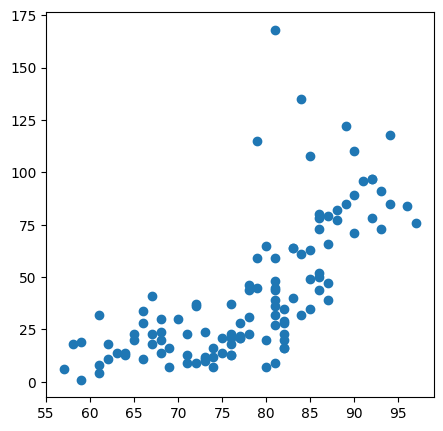

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(x_data, t_data)
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# model 정의
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1) # 입력 차원: 1, 출력 차원: 1
  def forward(self, x):
    return self.linear(x)

# model 생성
model = LinearRegressionModel()

# 손실함수
criterion = nn.MSELoss()

# optimizer
optimizer = optim.SGD(model.parameters(), 1e-4)

epochs = 1000 # 학습 횟수
for epoch in range(epochs):
  model.train()                     # 학습 mode
  y_pred = model(x_train)           # 예측
  loss = criterion(y_pred, t_train) # 손실 계산

  # 오차 역전파(Back-propagation)
  optimizer.zero_grad() # 기울기 초기화
  loss.backward()       # 기울기 계산
  optimizer.step()      # 가중치 upgrade

  if epoch % 100 == 0:
    print(f'epoch = {epoch}, loss = {loss.item()}')

# 최종 손실
print(f'final loss = {loss.item()}')

epoch = 0, loss = 952.70556640625
epoch = 100, loss = 865.05712890625
epoch = 200, loss = 864.8759155273438
epoch = 300, loss = 864.695068359375
epoch = 400, loss = 864.51416015625
epoch = 500, loss = 864.3333740234375
epoch = 600, loss = 864.1527099609375
epoch = 700, loss = 863.97216796875
epoch = 800, loss = 863.7918090820312
epoch = 900, loss = 863.6115112304688
final loss = 863.4330444335938


In [ ]:
# 예측
model.eval() # 평가 mode
test_input = torch.Tensor([[62]])
result = model(test_input).detach().numpy() # 기울기 계산을 비활성화
print(result)

# 가중치 편향 출력
weight = model.linear.weight.detach().numpy()
bias = model.linear.bias.detach().numpy()
print(f'weight = {weight}, bias = {bias}')

[[35.113815]]
weight = [[0.57575643]], bias = [-0.58308333]


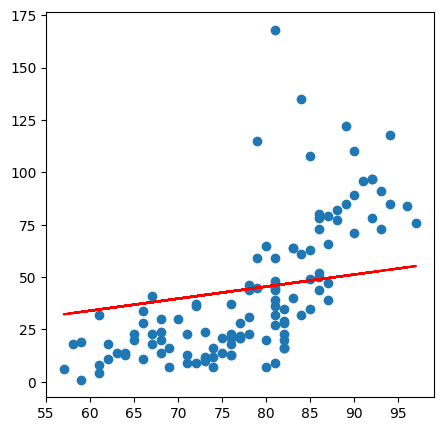

In [ ]:
# 결과 시각화
plt.figure(figsize=(5, 5))
plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * weight + bias, color='r')
plt.show()

# 이상치(Outlier)

## Tukey's Fences

median = 8.0
Q1 = 4.5
Q2 = 8.0
Q3 = 11.5
iqr_value = 7.0
upper_fense: 22.0
lower_fense: -6.0
outlier_data = [22.1]
general_data = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


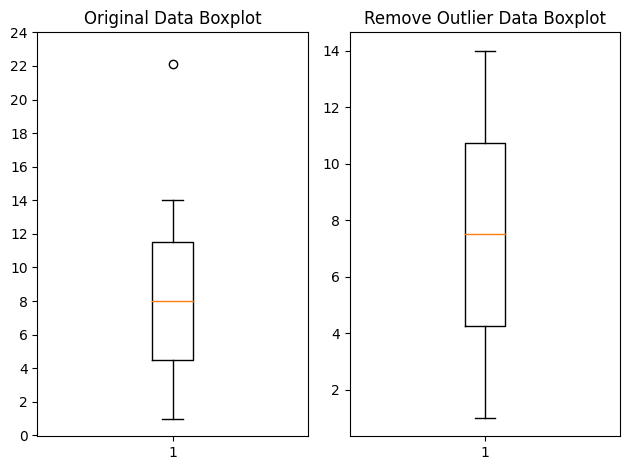

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14, 22.1])

# numpy로 사분위수를 구하려면 percentile()을 이용합니다.
print(f'median = {np.median(data)}')         # 중위수(2사분위) : 8
print(f'Q1 = {np.percentile(data,25)}')  # 1사분위 : 4.5
print(f'Q2 = {np.percentile(data,50)}')  # 2사분위 : 8.0
print(f'Q3 = {np.percentile(data,75)}')  # 3사분위 : 11.5

# IQR value(3사분위수 - 1사분위수)
iqr_value = np.percentile(data,75) - np.percentile(data,25)
print(f'iqr_value = {iqr_value}')

upper_fense = np.percentile(data,75) + (iqr_value * 1.5)
lower_fense = np.percentile(data,25) - (iqr_value * 1.5)

print(f'upper_fense: {upper_fense}') # 22.0
print(f'lower_fense: {lower_fense}') # -6.0

# outliers 출력
outlier_data = data[(data > upper_fense) | (data < lower_fense)]
print(f'outlier_data = {outlier_data}')

# 이상치 제거한 결과
general_data = data[np.isin(data, outlier_data, invert=True)]
print(f'general_data = {general_data}')

# BoxPlot
fig = plt.figure()  # 새로운 figure 생성

fig_1 = fig.add_subplot(1,2,1) # 1행 2열의 subplot위치에서 1번 위치
fig_2 = fig.add_subplot(1,2,2) # 1행 2열의 subplot위치에서 2번 위치

fig_1.set_title('Original Data Boxplot')
fig_1.boxplot(data)
fig_1.set_yticks(np.arange(0,25,2))

fig_2.set_title('Remove Outlier Data Boxplot')
fig_2.boxplot(general_data)
fig.tight_layout()  # subplot간의 간격유지
plt.show()

## Z-score

### scipy
  - 파이썬 라이브러리로 과학 컴퓨팅 도구로 사용
  - numpy 위에 구축되었으며 Scipy 스택의 일부
  - 선형 대수학, 통합, 이미지 처리, 최적화, 클러스터링, 희소 행렬 조작 등을 위한 모듈/알고리즘을 제공

In [ ]:
from scipy import stats

data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])
zscore_threshold = 1.8 # zscore outliers 임계값 (2.0이하가 optimal)

# outliers 출력
outlier_data = data[(np.abs(stats.zscore(data)) > zscore_threshold)]
print(f'outlier_data = {outlier_data}')

# 이상치 제거한 결과
general_data = data[np.isin(data, outlier_data, invert=True)]
print(f'general_data = {general_data}')

outlier_data = [22.1]
general_data = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


# Normalization(정규화)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

################################
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NeoWizard(박성호)-Pytorch/data/ozone.csv')
training_data = df[['Temp','Ozone']]

################################
# 결측값(NA) 제거
training_data = training_data.dropna(how='any')
print(f'training_data.shape = {training_data.shape}')  # (116, 2) 너무 많이 삭제됬습니다. 별로 좋지 않아요!

################################
# 이상치(Outlier) 처리

zscore_threshold = 2.0 # zscore outliers 임계값 (2.0이하가 optimal)

# Ozone에 대한 이상치(Outlier) 확인
outliers = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
print(f'outliers = {outliers}')

# Ozone에 대한 이상치(Outlier) 제거한 결과
training_data = training_data.loc[~training_data['Ozone'].isin(outliers)]
print(f'training_data.shape = {training_data.shape}')  # (103, 2)

################################
# 정규화 처리(Min-Max Normalization)

# 1차원 array의 경우 reshape(-1, 1)을 이용 shape을 변경
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# MinMaxScaler 클래스의 인스턴스 생성.
scaler_x = MinMaxScaler()
scaler_t = MinMaxScaler()

# scaler로 data 학습
scaler_x.fit(x_data)
scaler_t.fit(t_data)

# fit()으로 학습시킨 것을 적용
x_data_norm = scaler_x.transform(x_data)
t_data_norm = scaler_t.transform(t_data)

print(f'type(x_data_norm) = {type(x_data_norm)}')  # <class 'numpy.ndarray'>
print(f'x_data_norm.shape = {x_data_norm.shape}')  # (109, 1)
print(f't_data_norm.shape = {t_data_norm.shape}')  # (109, 1)

training_data.shape = (116, 2)
outliers = 29     115.0
61     135.0
85     108.0
98     122.0
100    110.0
116    168.0
120    118.0
Name: Ozone, dtype: float64
training_data.shape = (109, 2)
type(x_data_norm) = <class 'numpy.ndarray'>
x_data_norm.shape = (109, 1)
t_data_norm.shape = (109, 1)


## MinMaxScaler

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1차원 array의 경우 reshape(-1, 1)을 이용 shape을 변경
data = np.array([1, 5, 7, 2, 9, 11]).reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(data)  # data를 scaler로 변환하기 위한 함수 생성
scaled_data = scaler.transform(data)  # original data를 입력해 data를 변환
data = scaler.inverse_transform(scaled_data) # scaler로 변환된 data를 original data로 변환

print('==============================================')
print('original')
print('==============================================')
print(data)
print('==============================================')
print('scaled')
print('==============================================')
print(scaled_data)
print('==============================================')
print('original')
print('==============================================')
print(data)


original
[[ 1.]
 [ 5.]
 [ 7.]
 [ 2.]
 [ 9.]
 [11.]]
scaled
[[0. ]
 [0.4]
 [0.6]
 [0.1]
 [0.8]
 [1. ]]
original
[[ 1.]
 [ 5.]
 [ 7.]
 [ 2.]
 [ 9.]
 [11.]]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# numpy array
data = np.array([[1,  0.1,  0.3],
                 [4,  6.7,  6.0],
                 [7 , 18.0, 29.0]])

## MinMaxScaler 정의 [ feature_range로 normalization 범위를 0~1로 설정 ]
scaler = MinMaxScaler(feature_range=(0,1))

## numpy array에 Scaler 적용
scaled_data = scaler.fit_transform(data)

print('==============================================')
print('original')
print('==============================================')
print(data)
print('==============================================')
print('scaled')
print('==============================================')
print(scaled_data)

original
[[ 1.   0.1  0.3]
 [ 4.   6.7  6. ]
 [ 7.  18.  29. ]]
scaled
[[0.         0.         0.        ]
 [0.5        0.36871508 0.19860627]
 [1.         1.         1.        ]]


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = {'A' : [10, 20, 30, 40],
        'B' : [1, 2, 3, 4],
        'C' : [100, 200, 300, 400]}

df = pd.DataFrame(data)

## MinMaxScaler 정의 [ feature_range로 normalization 범위를 0~1로 설정 ]
scaler = MinMaxScaler(feature_range=(-1, 1))

## DataFrame에 Scaler 적용
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
# 또는 scaled_data = sc.fit_transform(df)

print('==============================================')
print('original')
print('==============================================')
print(df)
print('==============================================')
print('scaled')
print('==============================================')
print(scaled_data)

# 특정 col 정규화에 사용된 최대값(Max), 최소값(Min)
col_name = 'A'  # 추출하려는 열의 이름
col_min = scaler.data_min_[df.columns.get_loc(col_name)]
col_max = scaler.data_max_[df.columns.get_loc(col_name)]
print(f'col_min = {col_min}')
print(f'col_max = {col_max}')

original
    A  B    C
0  10  1  100
1  20  2  200
2  30  3  300
3  40  4  400
scaled
          A         B         C
0 -1.000000 -1.000000 -1.000000
1 -0.333333 -0.333333 -0.333333
2  0.333333  0.333333  0.333333
3  1.000000  1.000000  1.000000
col_min = 10.0
col_max = 40.0
